In [52]:
import torch
import torchvision
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

1a. 
weight: $ 5 \times 1 \times 4 \times 4 = 80$  
bias: 5

we have 5 channels in the feature maps. Each kernel has 4x4 dimension. We only have one channel in the input layer. 

1b.
the dimension of each feature map is 13 by 13.
since the input tensor's dimension was  $28 \times 28$ and the stride was 2, the kernel will start scanning at index 0 and end at index 14 with a stride of 2. There are a total of 13 scans. 

In [53]:
#2-a

## Create random tensor to represent a 7x7 image with 3 channels
random_tensor = torch.rand(1,3,7,7)

## Use random_tensor as input into Conv2d
from torch import nn
trial_net = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, stride=1)
trial_output = trial_net(random_tensor)
trial_relu = nn.ReLU()
trial_relu_result = trial_relu(trial_output)

trial_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
trial_relu_pool = trial_pool(trial_relu_result)

trial_pool_result = trial_pool(trial_output)
trial_pool_relu = trial_relu(trial_pool_result)

print(f'relu folloed by pool: {trial_relu_pool}')
print(f'pool folloed by relu: {trial_pool_relu}')
(trial_relu_pool == trial_pool_relu).unique()


relu folloed by pool: tensor([[[[0.1096, 0.2286],
          [0.0570, 0.1212]],

         [[0.3008, 0.4779],
          [0.2229, 0.3911]],

         [[0.2249, 0.0807],
          [0.2879, 0.0228]],

         [[0.3044, 0.3295],
          [0.1985, 0.3225]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)
pool folloed by relu: tensor([[[[0.1096, 0.2286],
          [0.0570, 0.1212]],

         [[0.3008, 0.4779],
          [0.2229, 0.3911]],

         [[0.2249, 0.0807],
          [0.2879, 0.0228]],

         [[0.3044, 0.3295],
          [0.1985, 0.3225]]]], grad_fn=<ReluBackward0>)


tensor([True])

The resulting feature map is independent of the order of max pooling and relu activation. 

In [54]:
#2-b
trial_relu = nn.ReLU()
trial_relu_result = trial_relu(trial_output)

trial_pool = nn.AvgPool2d(kernel_size = 2, stride = 2)
trial_relu_pool = trial_pool(trial_relu_result)

trial_pool_result = trial_pool(trial_output)
trial_pool_relu = trial_relu(trial_pool_result)

print(f'relu folloed by pool: {trial_relu_pool}')
print(f'pool folloed by relu: {trial_pool_relu}')
(trial_relu_pool == trial_pool_relu).unique()

relu folloed by pool: tensor([[[[0.0274, 0.1026],
          [0.0142, 0.0575]],

         [[0.2116, 0.2326],
          [0.1094, 0.1495]],

         [[0.0761, 0.0389],
          [0.0720, 0.0057]],

         [[0.0944, 0.2261],
          [0.1562, 0.1468]]]], grad_fn=<AvgPool2DBackward0>)
pool folloed by relu: tensor([[[[0.0000, 0.0247],
          [0.0000, 0.0000]],

         [[0.2116, 0.1984],
          [0.1004, 0.1385]],

         [[0.0000, 0.0000],
          [0.0000, 0.0000]],

         [[0.0944, 0.2261],
          [0.1562, 0.1468]]]], grad_fn=<ReluBackward0>)


tensor([False,  True])

these result are not same with the result we observedin part A when we use average pooling. 

3-1

the dimension of the output tensor produced is [1, 10, 25, 25]

the dimenion after  nn.ReLU(): [1, 10, 25, 25]

the dimension after nn.MaxPool2d(2,2): [1, 10, 12, 12]

3-2 

No, because the linear layer has a weight that takes in the dimension 750. Only when we have an image with dimension 28x28, can we pass that layer of network. 


3-3 

the dimensions of the output for each layer is labeled 

3-4 

We can change 250 without requiring a new format of images. 



In [55]:

from torch import nn

class my_net(nn.Module):
    
    ## Constructor commands
    def __init__(self):
        super(my_net, self).__init__()
        
        ## Define architecture
        self.conv_stack = nn.Sequential( # [1, 1, 28, 28]]
            nn.Conv2d(1, 10, 4, 1), # [1, 10, 25, 25]
            nn.ReLU(), # [1, 10, 25, 25]
            nn.MaxPool2d(2, 2), # [1, 10, 12, 12]
            nn.Conv2d(10, 30, 2, 1), # [1, 30, 10, 10]
            nn.ReLU(), # [1, 30, 10, 10]
            nn.MaxPool2d(2, 2), # [1, 30, 5, 5]
            nn.Flatten(), # [750]
            nn.Linear(750, 250),
            nn.ReLU(),
            nn.Linear(250, 10)
        )
    
    ## Function to generate predictions
    def forward(self, x):
        scores = self.conv_stack(x)
        return scores

In [56]:
# 4-a
import os

path = './cats_dogs/'
img_names = os.listdir(path)
img_names.sort()
# img_names.remove('.DS_Store')
images = np.empty(shape = (len(img_names), 64, 64, 3))
for idx, name in enumerate(img_names):
    img_name = path + name
    # Use you favourite library to load the image
    image = plt.imread(img_name)
    images[idx] = image
images = torch.from_numpy(images)
images = torch.movedim(images, source = 3, destination = 1)

classes = [1,0] 

## Repeat an appropriate number of times (print to check)
labels = np.repeat(classes, [50, 100], axis=0)

In [57]:
images.shape

torch.Size([150, 3, 64, 64])

In [58]:
from sklearn.model_selection import train_test_split
train_X_image, test_X_image, train_y_image, test_y_image = train_test_split(images, labels, 
                                                                            test_size = 0.25, random_state = 5)

In [59]:
#4 - b
# Part B - Create a composition of data transformations that apply 
#   Gaussian blur, 
#   random horizontal flipping, 
#   and random rotation (between 0 and 180 degrees). You may consult the link at the end of the previous section for information on how to implement random rotation.

## Compose Transformations
from torchvision import transforms
data_transforms = transforms.Compose([
        transforms.GaussianBlur(kernel_size=(5,5), sigma=(0.1, 5)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=(0, 180))
])

In [60]:
# 4-c
from torch import nn

class Cat_net(nn.Module):
    
    ## Constructor commands
    def __init__(self):
        super(Cat_net, self).__init__()
        
        ## Define architecture
        self.conv_stack = nn.Sequential( # [N, 3, 64, 64]
            nn.Conv2d(3, 8, 3, 1), # [N, 8, 62, 62]
            nn.ReLU(),
            nn.MaxPool2d(2,2), # [N, 8, 31, 31]
            nn.Conv2d(8, 16, 2, 1), # [N, 16, 29, 29]
            nn.ReLU(),
            nn.MaxPool2d(2,2), # [N, 16, 15, 15]
            nn.Flatten(),
            nn.Linear(3600, 200),
            nn.ReLU(),
            nn.Linear(200, 2)
        )
    
    ## Function to generate predictions
    def forward(self, x):
        scores = self.conv_stack(x)
        return scores

In [61]:
# 4-d
## Hyperparms
epochs = 500
lrate = 0.001
bsize = 28

## For reproduction purposes 
torch.manual_seed(3)

## Cost Function
cost_fn = nn.CrossEntropyLoss()

## Intialize the model
net = Cat_net()

## Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(net.parameters(), lr = lrate)


In [62]:
## Make DataLoader
from torch.utils.data import DataLoader, TensorDataset
train_y_tensor = torch.Tensor(train_y_image)
train_loader = DataLoader(TensorDataset(train_X_image.type(torch.FloatTensor), 
                        train_y_tensor.type(torch.LongTensor)), batch_size=bsize)
test_y_tensor = torch.Tensor(test_y_image)
test_loader = DataLoader(TensorDataset(test_X_image.type(torch.FloatTensor), 
                        test_y_tensor.type(torch.LongTensor)), batch_size=bsize)
                        

In [63]:
## Re-run the training loop, notice the new data_transforms() command
track_cost = np.zeros(epochs)

for epoch in range(epochs):
    cur_cost = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        ## Transform the input data using our data augmentation strategies
        inputs = data_transforms(inputs)
        
        ## Same as before
        optimizer.zero_grad()
        outputs = net(inputs)
        cost = cost_fn(nn.Softmax(dim=1)(outputs), labels)
        cost.backward()
        optimizer.step()
        cur_cost += cost.item()
    
    ## Store the accumulated cost at each epoch
    track_cost[epoch] = cur_cost
    # print(f"Epoch: {epoch} Cost: {cur_cost}") ## Uncomment this if you want printed updates

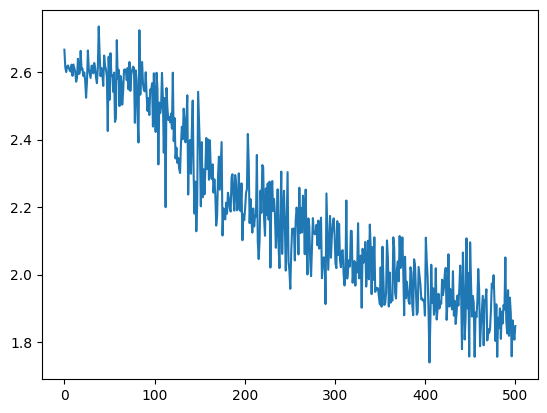

In [64]:
plt.plot(np.linspace(0, epochs, epochs), track_cost)
plt.show()

In [65]:
train_correct = 0
train_total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
print(f'train accuracy is {train_correct / train_total}')

train accuracy is 0.7410714285714286


In [66]:
## Repeat evaluation loop suing the test data
test_correct = 0
test_total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
print(f'test accuracy is {test_correct/test_total}! (better than Prof. Miller\'s benchmark :) )')

test accuracy is 0.8421052631578947! (better than Prof. Miller's benchmark :) )
